# Histopathologic Cancer Detection using Deep Learning

### 0. Importamos las librerias necesarias para el analisis de las imágenes y la realización de las predicciones

In [45]:
import numpy as np 
import pandas as pd
from glob import glob 
from skimage.io import imread
import os
import matplotlib.pyplot as plt
import shutil
import keras.backend as K

## 1. Preprocesamiento de los datos

### 1.1 Armamos el dataframe con el conjunto de datos de entrenamiento

In [2]:
train_dir = '../iis-project/train'
df = pd.DataFrame({'path': glob(os.path.join(train_dir,'*.tif'))})
labels = pd.read_csv("../iis-project/train_labels.csv")
df['label'] = labels['label']
df.head(10)



,path,label
0,../iis-project/train/052fddb3940ec9f4b9d7d0925...,0
1,../iis-project/train/70e728f78f937dfb16e9867e8...,1
2,../iis-project/train/9b59ba4f1bb5ea63828450fdc...,0
3,../iis-project/train/e0dfb12d1e7116ffa26b7a967...,0
4,../iis-project/train/ea62cbcd62f4438f47902b1bf...,0
5,../iis-project/train/cc5be12926073b97cb9d5146e...,0
6,../iis-project/train/5bf198b5f0732515d0d402a85...,1
7,../iis-project/train/09e441c22952ad49a8a4acb81...,1
8,../iis-project/train/6dfe8a3ca29bff5a2bb108ec2...,0
9,../iis-project/train/7e4b77f241ef3d8d21b188b75...,0


### 1.2 Se selecciona una muestra de cada etiqueta

           
    Se crean 2 dataframes, uno para cada etiqueta, cada uno de ellos con 10000 elementos ya que tomar en cuenta todo el conjunto no resulta práctico por las limitaciones de recursos fisicos como memoria RAM y/o disco. A partir de estos dataframes se crea uno nuevo que contenga el conjunto de datos reducido.

In [29]:
sample_label0 = df[df.label == 0].sample(1000, random_state=50)
sample_label1 = df[df.label == 1].sample(1000, random_state=50)


reduced_df = pd.DataFrame(pd.concat([sample_label0, sample_label1]))
reduced_df

,path,label
14294,../iis-project/train/49d061af6863059d9afabf7e2...,0
83175,../iis-project/train/26891da24730bc1c924b1ad13...,0
74374,../iis-project/train/39f9bd4975b0b95f840450a91...,0
26984,../iis-project/train/d9b9cd49eb89bb553f88f183a...,0
57505,../iis-project/train/11f6b098f3fb28e0db9698ac8...,0
197135,../iis-project/train/9fd8451bad7342aa3ba77dca8...,0
31167,../iis-project/train/3312e73673436be1ea66f1bc1...,0
77031,../iis-project/train/bbaf303a6a3ac009b0bd91d76...,0
70712,../iis-project/train/a67746c73686d14cf97a99811...,0
26579,../iis-project/train/061007f8eb6746ccc272a8c5f...,0


In [30]:
directory_1 = "../iis-project/red_train"
directory_2 = "../iis-project/red_validation"

shutil.rmtree(directory_1)
shutil.rmtree(directory_2)

if not os.path.exists(directory_1):
    os.makedirs(directory_1)
if not os.path.exists(directory_2):
    os.makedirs(directory_2)

for folder in [directory_1, directory_2]:
    for subfolder in ['0', '1']:
        path = os.path.join(folder, subfolder)
        os.makedirs(path, exist_ok=True)

In [31]:
from sklearn.model_selection import train_test_split

#Stratifying data into train and validation with label 0
X_train0, X_val0, y_train0, y_val0 = train_test_split(
        sample_label0['path'],sample_label0['label'], test_size=0.3, random_state=42)

#Stratifying data into train and validation with label 1
X_train1, X_val1, y_train1, y_val1 = train_test_split(
        sample_label1['path'],sample_label1['label'], test_size=0.3, random_state=42)


lt0 = X_train0.tolist()
lt1 = X_train1.tolist()
lv0 = X_val0.tolist()
lv1 = X_val1.tolist()
for files in lt0:
    shutil.copy(files, os.path.join(directory_1,'0'))
for files in lt1:
    shutil.copy(files, os.path.join(directory_1,'1'))
for files in lv0:
    shutil.copy(files, os.path.join(directory_2,'0'))
for files in lv1:
    shutil.copy(files, os.path.join(directory_2,'1'))



## 2. Comparación de modelos

## 2.1 Transfer Learning

### 2.1.1 Data augmentation

### 2.1.2 Entrenamos el modelo

In [79]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 96, 96

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = directory_1
validation_data_dir = directory_2
nb_train_samples = len(lt0) + len(lt1)
nb_validation_samples = len(lv0) + len(lv1)
epochs = 10
batch_size = 10

datagen = ImageDataGenerator(rescale=1. / 255)

# build the MobileNet network
model = applications.MobileNet(include_top=False, weights=None
                               , input_shape=(img_width, img_height, 3))

generator_train = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)

bottleneck_features_train = model.predict_generator(
    generator_train, nb_train_samples // batch_size)

np.save('bottleneck_features_train.npy',
        bottleneck_features_train)


generator_val = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_validation = model.predict_generator(
    generator_val, nb_validation_samples // batch_size)
np.save('bottleneck_features_validation.npy',
        bottleneck_features_validation)

Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [85]:
train_data = np.load('bottleneck_features_train.npy')
train_labels = np.array(
    [0] * int(nb_train_samples / 2) + [1] * int(nb_train_samples / 2))

validation_data = np.load('bottleneck_features_validation.npy')
validation_labels = np.array(
    [0] * int(nb_validation_samples / 2) + [1] * int(nb_validation_samples / 2))

model_1 = Sequential()
model_1.add(Flatten(input_shape=train_data.shape[1:]))
model_1.add(Dense(256, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(optimizer='rmsprop',
              loss='binary_crossentropy', metrics=['accuracy'])

history = model_1.fit(train_data, train_labels,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(validation_data, validation_labels))
model_1.save_weights(top_model_weights_path)

Train on 1400 samples, validate on 600 samples


TypeError: 'list' object cannot be interpreted as an integer

In [81]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2359552   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 257       
Total params: 2,359,809
Trainable params: 2,359,809
Non-trainable params: 0
_________________________________________________________________


In [82]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

for x_batch, y_batch in validation_generator:
  print(y_batch)
  print(model_1.predict_proba(model.predict(x_batch)))
  break

Found 600 images belonging to 2 classes.
[1. 1. 1. 0. 0. 0. 1. 0. 0. 1.]
[[0.5006878]
 [0.5006878]
 [0.5006878]
 [0.5006878]
 [0.5006878]
 [0.5006878]
 [0.5006878]
 [0.5006878]
 [0.5006878]
 [0.5006878]]


### 2.1.3 Generamos las graficas con las medidas de desempeño

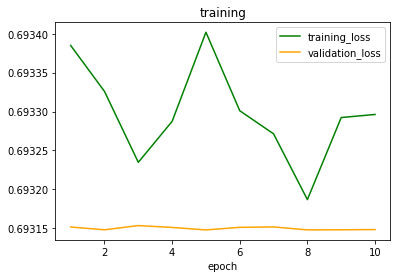

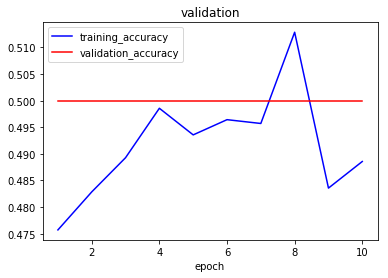

In [83]:
# Training plots
epochs = [i for i in range(1, len(history.history['loss'])+1)]

plt.plot(epochs, history.history['loss'], color='green', label="training_loss")
plt.plot(epochs, history.history['val_loss'], color='orange', label="validation_loss")
plt.legend(loc='best')
plt.title('training')
plt.xlabel('epoch')
plt.show()
plt.close()

plt.plot(epochs, history.history['acc'], color='blue', label="training_accuracy")
plt.plot(epochs, history.history['val_acc'], color='red',label="validation_accuracy")
plt.legend(loc='best')
plt.title('validation')
plt.xlabel('epoch')
plt.show()
plt.close()

### 2.1.4 Creamos el archivo csv con las predicciones

In [75]:
testing_files = glob(os.path.join('../iis-project/test/','*.tif'))
submission = pd.DataFrame()
for index in range(0, len(testing_files), 10):
    data_frame = pd.DataFrame({'path': testing_files[index:index+5000]})
    data_frame['id'] = data_frame.path.map(lambda x: x.split('/')[3].split(".")[0])
    data_frame['image'] = data_frame['path'].map(imread)
    data_frame
    images = np.stack(data_frame.image, axis=0)
    predicted_labels = [model.predict(np.expand_dims(image/255.0, axis=0))[0][0] for image in images]
    predictions = np.array(predicted_labels)
    data_frame['label'] = predictions
    submission = pd.concat([submission, data_frame[["id", "label"]]])
submission.to_csv("sub.csv", index=False, header=True)

AssertionError: Shape of new values must be compatible with manager shape

In [71]:
df = pd.DataFrame({'name': ['Raphael', 'Donatello'],
                    'mask': ['red', 'purple'],
                    'weapon': ['sai', 'bo staff']})
df.to_csv(index=False)

excel_writer = pd.ExcelWriter("../iis-project/e.xlsx", engine='xlsxwriter')
df.to_excel(excel_writer, 'Employee Info')
excel_writer.save()


### 2.1.5 Obtenemos el area bajo la curva ROC